In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [2]:
data= pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe(include=[np.number])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

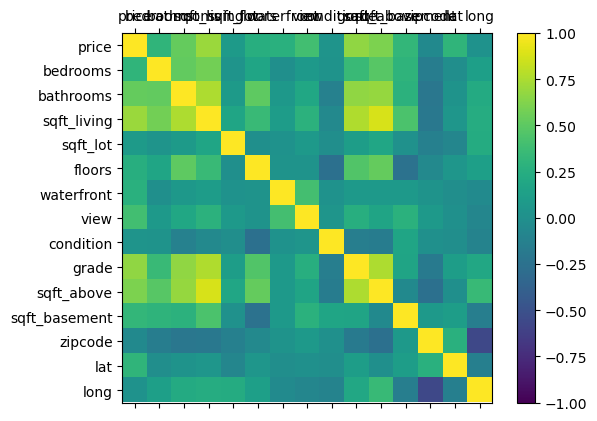

In [5]:
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [6]:
data['waterfront'] = pd.Categorical(data['waterfront'], ordered=True)
data['view'] = pd.Categorical(data['view'], ordered=True)
data['condition'] = pd.Categorical(data['condition'], ordered=True)
data['grade'] = pd.Categorical(data['grade'], ordered=False)
data['zipcode'] = pd.Categorical(data['zipcode'], ordered=False)

In [7]:
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

<Axes: xlabel='sqft_living', ylabel='price'>

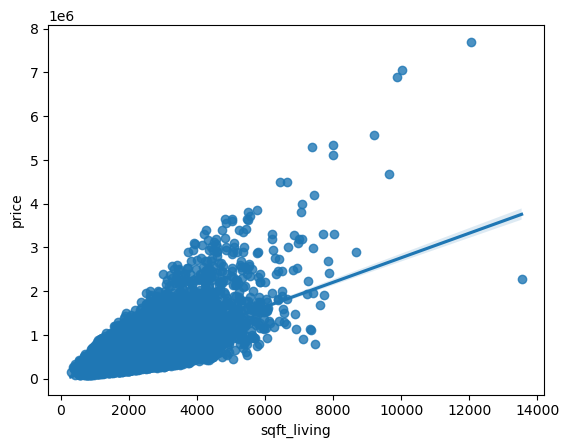

In [8]:
sns.regplot(x='sqft_living',y='price',data=data)

<Axes: xlabel='sqft_basement', ylabel='price'>

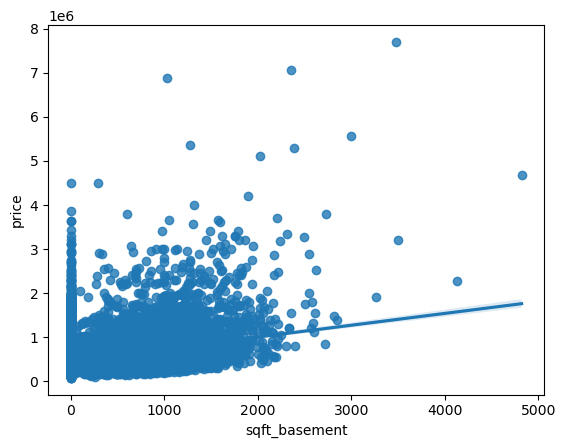

In [9]:
sns.regplot(x='sqft_basement',y='price',data=data)

<Axes: xlabel='sqft_above', ylabel='price'>

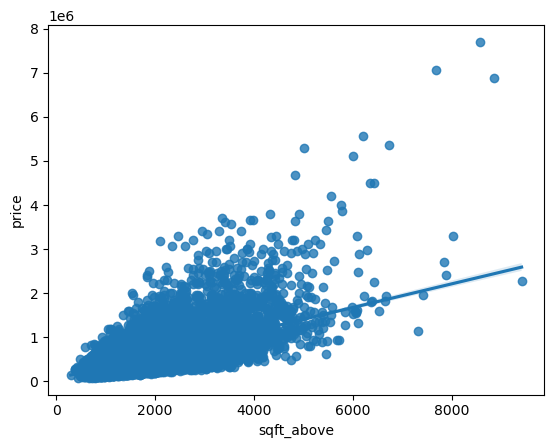

In [10]:
sns.regplot(x='sqft_above',y='price',data=data)

<Axes: xlabel='bedrooms', ylabel='price'>

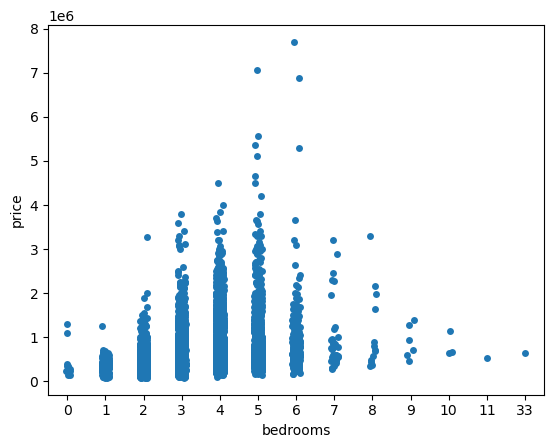

In [11]:
sns.stripplot(x='bedrooms', y='price',data=data)

<Axes: xlabel='bathrooms', ylabel='price'>

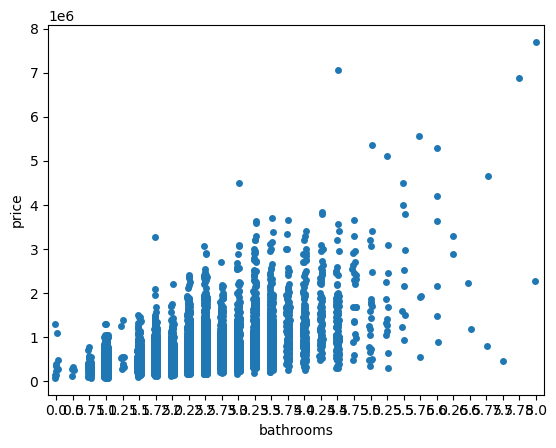

In [12]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)

<Axes: xlabel='grade', ylabel='price'>

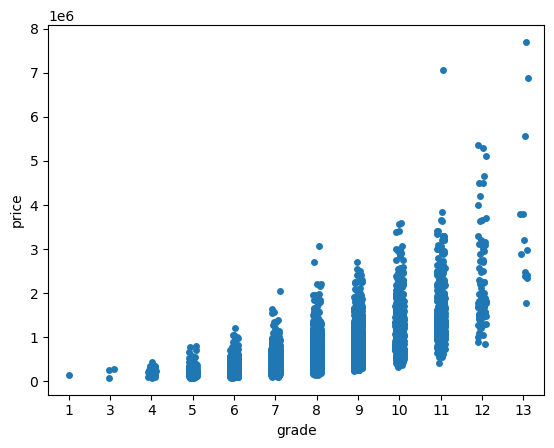

In [13]:
sns.stripplot(x='grade', y='price',data=data, size=5)


In [14]:
data=data[data['bedrooms'] < 10]

In [15]:
data=data[data['bathrooms']<8]

In [16]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [18]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)

In [19]:
y=data['price']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [21]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
19151,3,2.50,1830,1830.0,0,0,0,0,0,1,0,0,0,0,0
6248,4,2.50,2310,2310.0,0,0,0,0,0,1,0,0,0,0,0
13665,4,1.50,1800,1800.0,0,0,0,0,1,0,0,0,0,0,0
7241,4,2.50,2740,2740.0,0,0,0,0,0,1,0,0,0,0,0
17293,3,1.75,1280,1030.0,0,0,0,0,0,1,0,0,0,0,0


In [22]:
reg=LinearRegression()

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)

In [24]:
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-2.40111208e+04  1.18642201e+03  2.33247830e+02 -9.39574456e+01
  4.46654642e+04  5.62882284e+04  6.15990399e+04  8.28935793e+04
  1.14380996e+05  1.87479956e+05  3.32518065e+05  5.28277635e+05
  8.30132685e+05  1.33104999e+06  2.03634298e+06]


In [26]:
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))

58129132534.30021


In [27]:
reg.score(x_test,y_test)

0.5945896085464755

In [28]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [29]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [31]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor()
reg.fit(x_train, y_train)

HistGradientBoostingRegressor()

In [32]:
from sklearn.inspection import permutation_importance
result = permutation_importance(reg, x_test, y_test, n_repeats=30, random_state=0)
print("Permutation Importance:")
print(result.importances_mean)

Permutation Importance:
[-4.15781637e-05  4.97902656e-03  3.31673163e-01  1.38847099e-02
  1.09963679e-03  1.40332822e-02 -1.85718985e-04  1.26093817e-02
  2.66582989e-03  3.21530416e-01  1.37832179e-01  3.75138325e-02
  3.89229026e-03  3.52751609e-02  5.33166885e-05  1.12519715e-03
  2.81247068e-03  8.78919926e-03  8.76325433e-05  2.34504818e-03
  2.27002665e-04  2.08411921e-03  0.00000000e+00  0.00000000e+00
  5.38328239e-05  9.32974034e-04  5.82822655e-03  2.19721028e-03
  3.59342407e-03  7.06310907e-03  4.39295718e-03  1.89733266e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.54604586e-03
  7.55382934e-05  1.77637702e-03  0.00000000e+00  9.21067399e-05
  1.51014439e-04  0.00000000e+00  2.93087578e-04  7.85298019e-05
  0.00000000e+00  0.00000000e+00  1.79476981e-05  2.65031943e-04
  0.00000000e+00  1.75279406e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.54234153e-04  3.03375558e-05  0.00000000e+00
  5.88858767e-03  1.77896410e-03  2.35903482e-05  2.22715114e-05
 